# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data and Getting Information

In [2]:
working_data = pd.read_csv('Hackathon_Working_Data.csv')
working_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [3]:
print('Number of GRP(Category): {}'.format(working_data['GRP'].nunique()))
print('Number of SGRP(Subcategory): {}'.format(working_data['SGRP'].nunique()))
print('Number of SSGRP(Sub Sub Category): {}'.format(working_data['SSGRP'].nunique()))
print('Number of CMP(Company/Manufacturer): {}'.format(working_data['CMP'].nunique()))
print('Number of MBRD(Mother Brand): {}'.format(working_data['MBRD'].nunique()))
print('Number of BRD(Brand): {}'.format(working_data['BRD'].nunique()))

Number of GRP(Category): 80
Number of SGRP(Subcategory): 174
Number of SSGRP(Sub Sub Category): 232
Number of CMP(Company/Manufacturer): 354
Number of MBRD(Mother Brand): 643
Number of BRD(Brand): 1315


In [4]:
stores = list(working_data['STORECODE'].unique())
stores

['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']

# Preparing Data for insights

In [5]:
working_data['UNIQUE_ID'] = working_data['STORECODE'].str.cat(working_data['BILL_ID'], sep="_")

In [6]:
by_store = working_data.groupby("UNIQUE_ID").mean()[["DAY", "BILL_AMT", "QTY"]]
by_store

,DAY,BILL_AMT,QTY
UNIQUE_ID,,,
N10_T1038,5.0,34.0,1.000000
N10_T1039,5.0,46.0,1.000000
N10_T1040,5.0,86.0,1.000000
N10_T1043,5.0,20.0,1.000000
N10_T1048,5.0,180.0,1.000000
...,...,...,...
N9_T940,2.0,200.0,1.000000
N9_T95,7.0,56.0,1.000000
N9_T953,3.0,1656.0,2.545455


In [7]:
merged_data = pd.merge(working_data, by_store, on="UNIQUE_ID")
merged_data

,MONTH,STORECODE,DAY_x,BILL_ID,BILL_AMT_x,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4.0,225.0,1.000000
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4.0,95.0,1.000000
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4.0,10.0,1.000000
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4.0,108.0,1.000000
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4.0,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31.0,10.0,1.000000
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31.0,88.0,1.333333
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31.0,88.0,1.333333
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31.0,88.0,1.333333


In [8]:
merged_data = merged_data.drop(["DAY_x", "BILL_AMT_x"], axis=1)
merged_data

,MONTH,STORECODE,BILL_ID,QTY_x,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_ID,DAY_y,BILL_AMT_y,QTY_y
0,M1,N1,T375,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1_T375,4.0,225.0,1.000000
1,M1,N1,T379,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1_T379,4.0,95.0,1.000000
2,M1,N1,T381,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1_T381,4.0,10.0,1.000000
3,M1,N1,T382,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1_T382,4.0,108.0,1.000000
4,M1,N1,T384,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1_T384,4.0,19.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26980,M3,N10,T5999,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK,N10_T5999,31.0,10.0,1.000000
26981,M3,N10,T6007,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE,N10_T6007,31.0,88.0,1.333333
26982,M3,N10,T6007,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G,N10_T6007,31.0,88.0,1.333333
26983,M3,N10,T6007,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN,N10_T6007,31.0,88.0,1.333333


In [9]:
print('Num: {}'.format(merged_data['UNIQUE_ID'].nunique()))

Num: 13491


In [10]:
unique_sales = merged_data.groupby("UNIQUE_ID", as_index=True).mean()[["DAY_y", "BILL_AMT_y"]]
unique_sales

,DAY_y,BILL_AMT_y
UNIQUE_ID,,
N10_T1038,5.0,34.0
N10_T1039,5.0,46.0
N10_T1040,5.0,86.0
N10_T1043,5.0,20.0
N10_T1048,5.0,180.0
...,...,...
N9_T940,2.0,200.0
N9_T95,7.0,56.0
N9_T953,3.0,1656.0


In [11]:
unique_sales['STORE'] = unique_sales.index.str.split('_').str[0]
unique_sales

,DAY_y,BILL_AMT_y,STORE
UNIQUE_ID,,,
N10_T1038,5.0,34.0,N10
N10_T1039,5.0,46.0,N10
N10_T1040,5.0,86.0,N10
N10_T1043,5.0,20.0,N10
N10_T1048,5.0,180.0,N10
...,...,...,...
N9_T940,2.0,200.0,N9
N9_T95,7.0,56.0,N9
N9_T953,3.0,1656.0,N9


# Analysis of Data

**Total Sales by Each Store**

Text(0, 0.5, 'Sales')

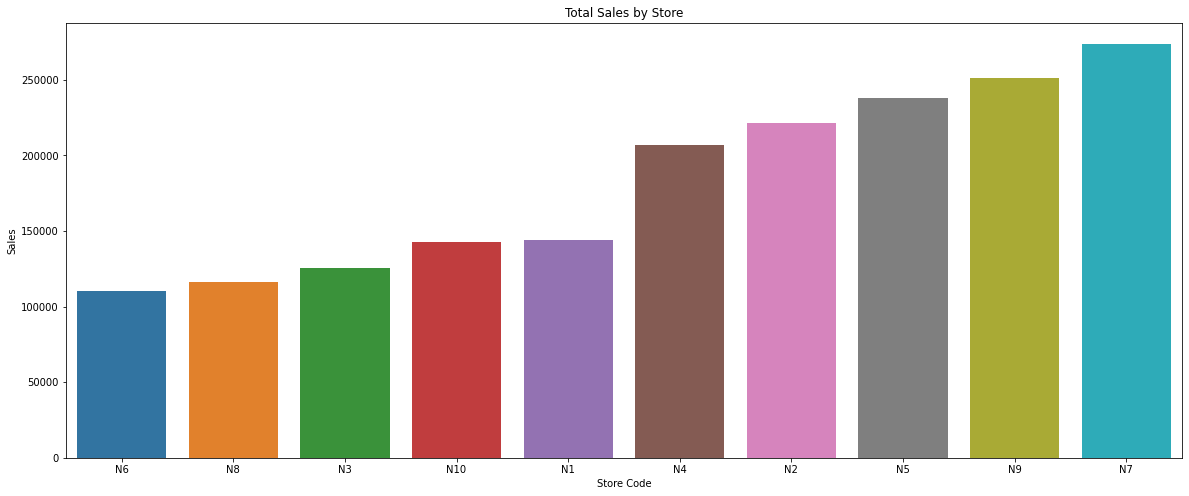

In [12]:
sales_by_store = unique_sales.groupby("STORE").sum().sort_values('BILL_AMT_y', ascending=True)
plt.figure(figsize=(20,8))
sns.barplot(x=sales_by_store.index,y=sales_by_store['BILL_AMT_y'],data=sales_by_store)
plt.title("Total Sales by Store")
plt.xlabel("Store Code")
plt.ylabel("Sales")

**Sale on each Day by Stores**

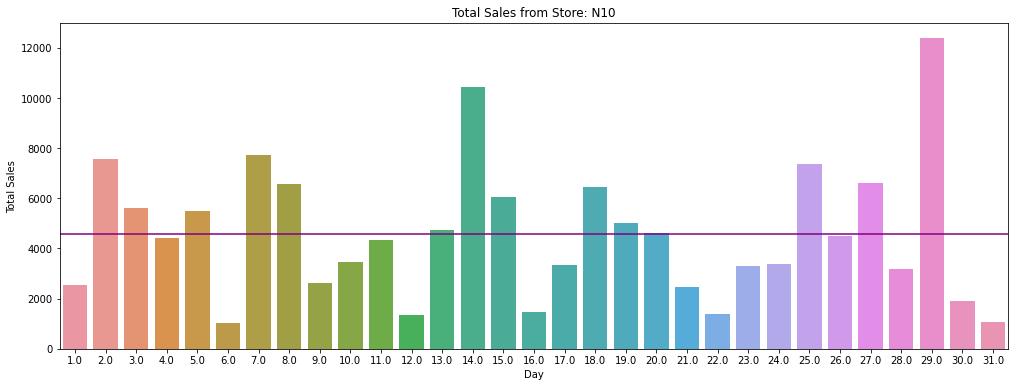

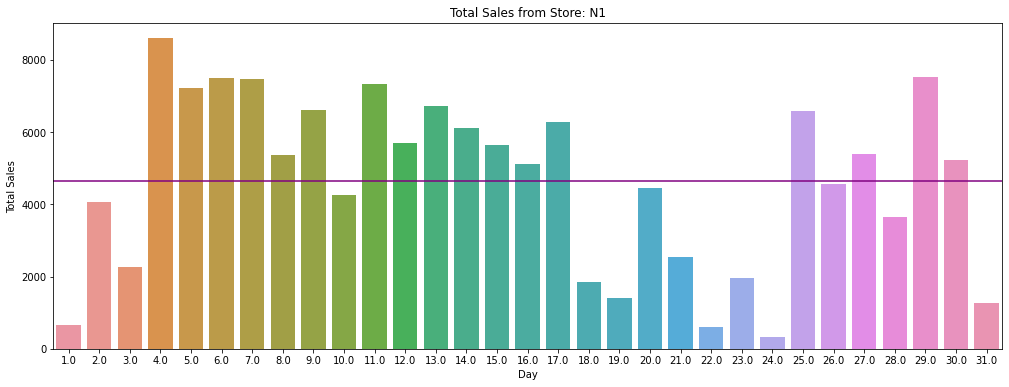

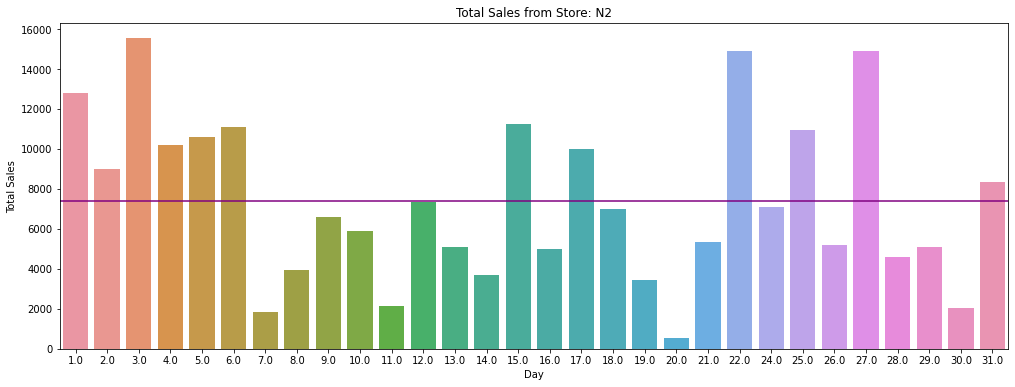

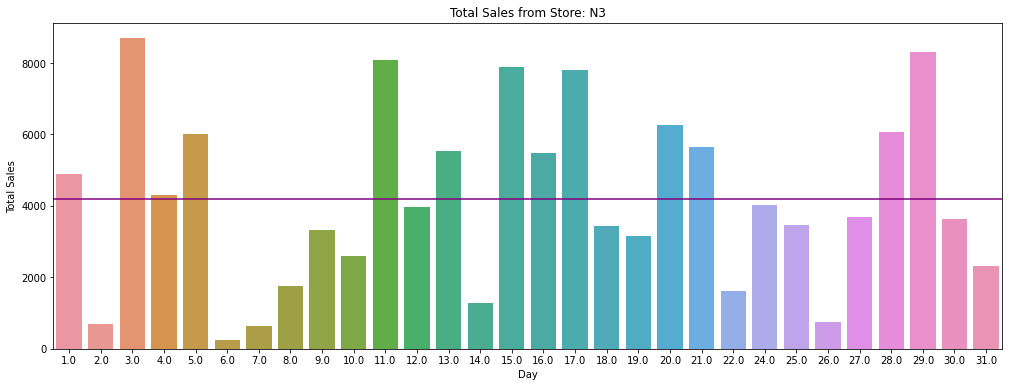

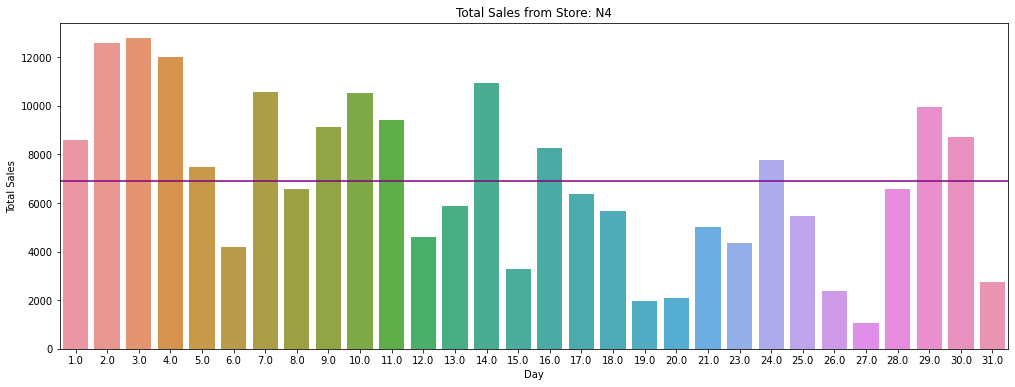

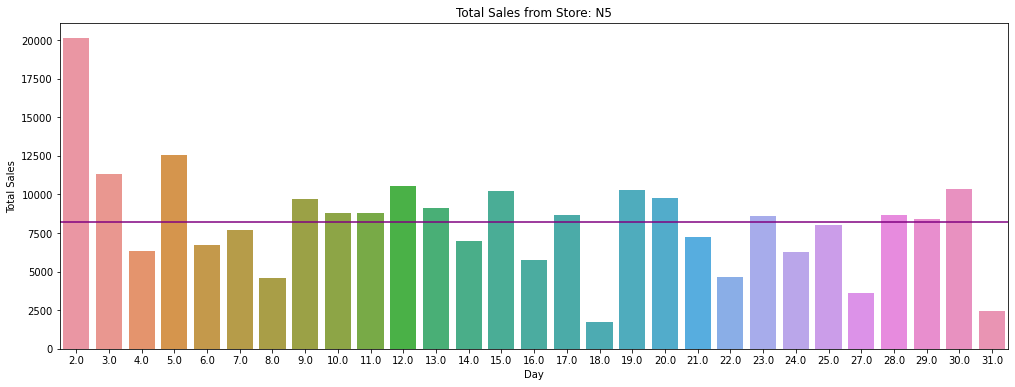

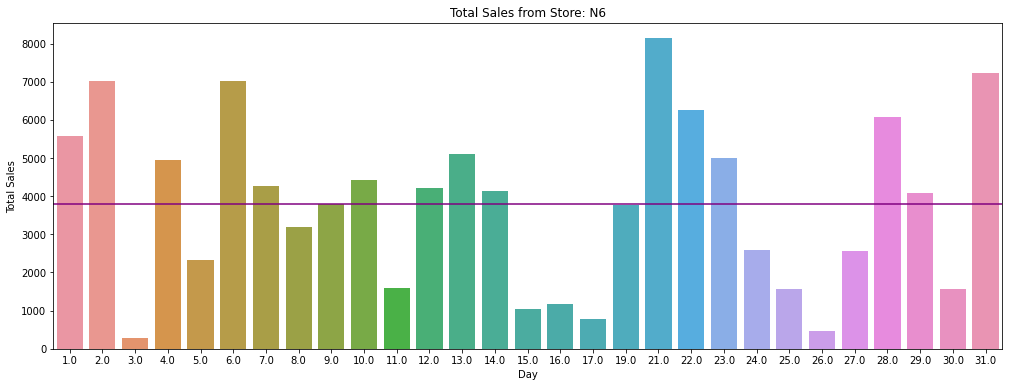

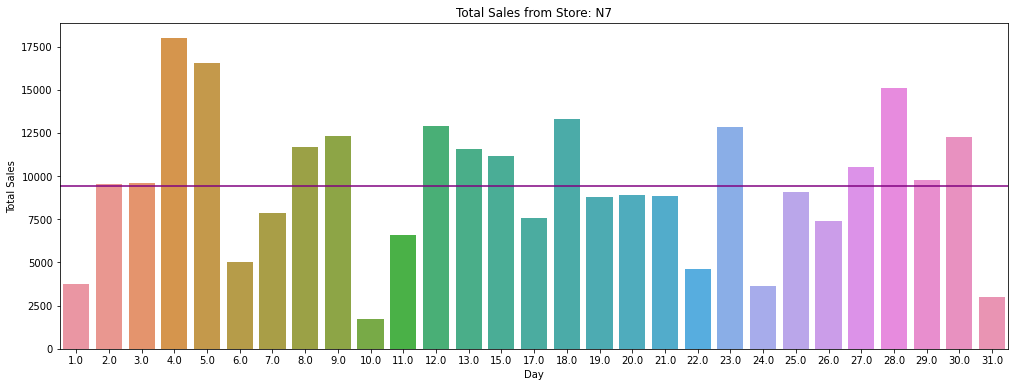

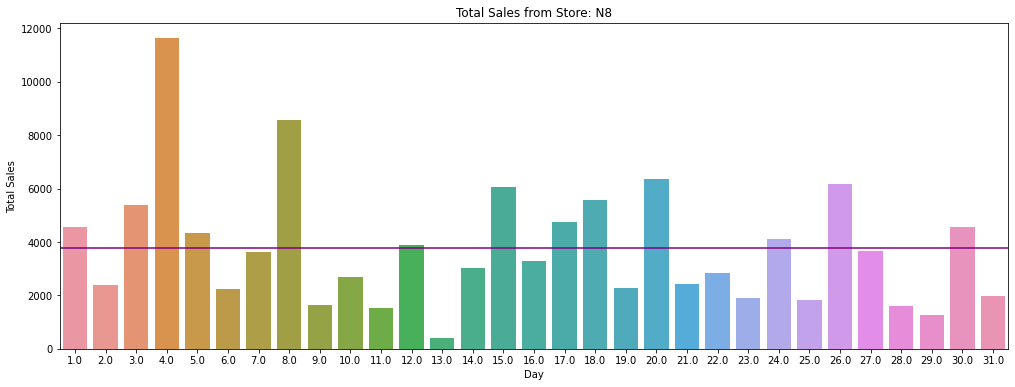

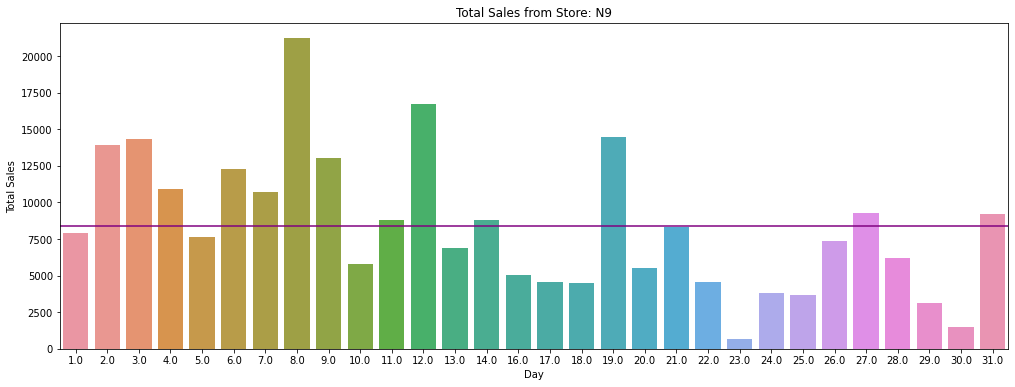

In [13]:
for i in unique_sales.STORE.unique():
    store = unique_sales.loc[unique_sales.STORE == i].groupby("DAY_y").sum()
    plt.figure(figsize=(17,6))
    sns.barplot(x=store.index,y=store["BILL_AMT_y"],data=store).axhline(store["BILL_AMT_y"].mean(),color='purple')
    plt.title("Total Sales from Store: " + i)
    plt.xlabel("Day")
    plt.ylabel("Total Sales")

**Top 25 Categories sold(by VALUE)**

Text(0, 0.5, 'Categories')

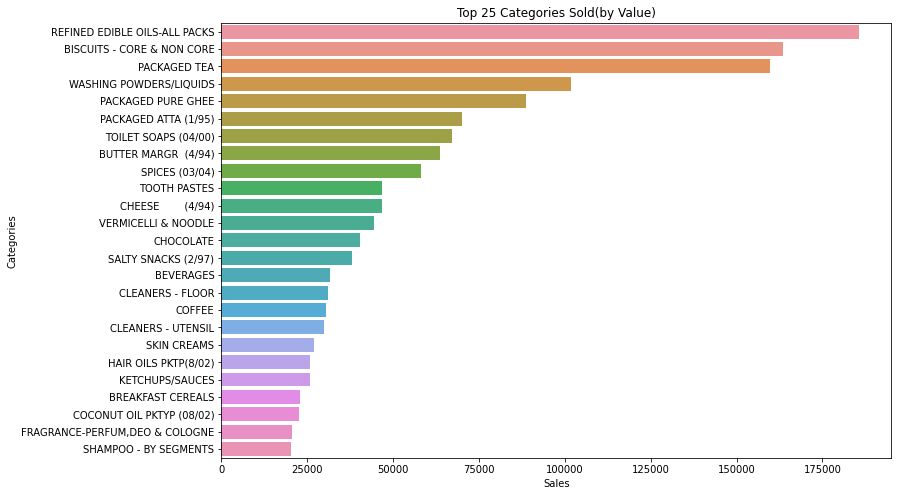

In [14]:
top_items_sales = merged_data.groupby('GRP').sum().sort_values("VALUE",ascending=False)[['QTY_x','PRICE','VALUE']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=top_items_sales.index,data=top_items_sales)
plt.title("Top 25 Categories Sold(by Value)")
plt.xlabel("Sales")
plt.ylabel("Categories")

**Top 25 Categories sold(by Quantity)**

Text(0, 0.5, 'Categories')

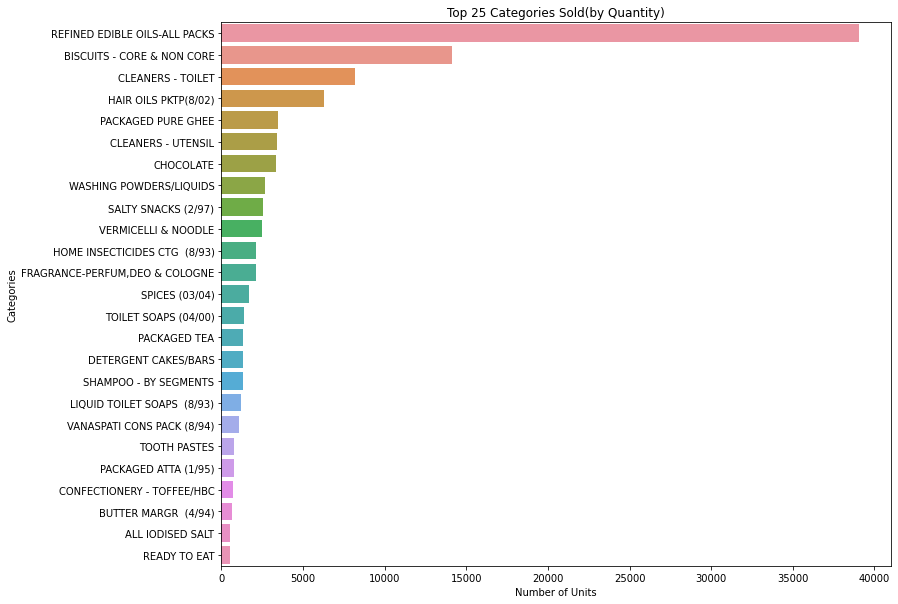

In [15]:
top_items = merged_data.groupby('GRP').sum().sort_values("QTY_x",ascending=False)[['QTY_x','PRICE']][0:25]
plt.figure(figsize=(12,10))
sns.barplot(x='QTY_x',y=top_items.index,data=top_items)
plt.title("Top 25 Categories Sold(by Quantity)")
plt.xlabel("Number of Units")
plt.ylabel("Categories")

**Most Expensive and least expensive items**

Text(0.5, 0, 'Average Price')

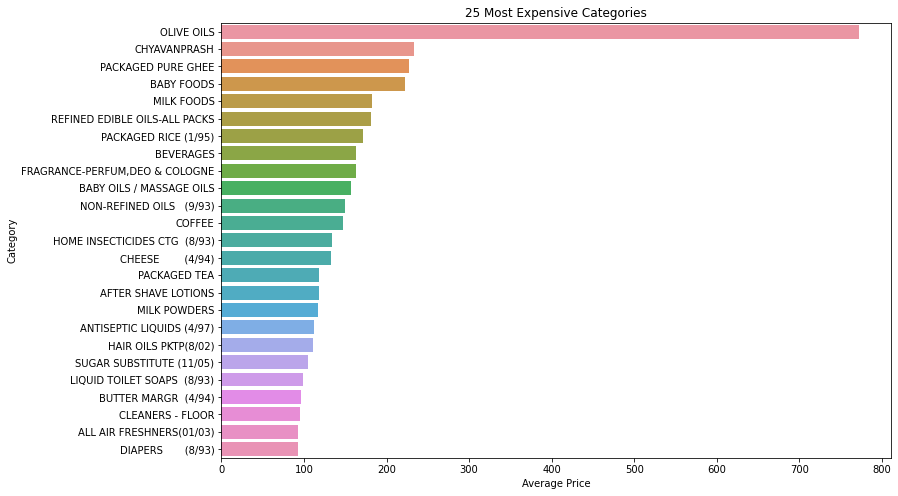

In [16]:
grp_per_price = merged_data.groupby("GRP").mean().sort_values("PRICE", ascending=False)[["PRICE","QTY_x"]][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='PRICE',y=grp_per_price.index,data=grp_per_price)
plt.title("25 Most Expensive Categories")
plt.ylabel("Category")
plt.xlabel("Average Price")

Text(0.5, 0, 'Average Price')

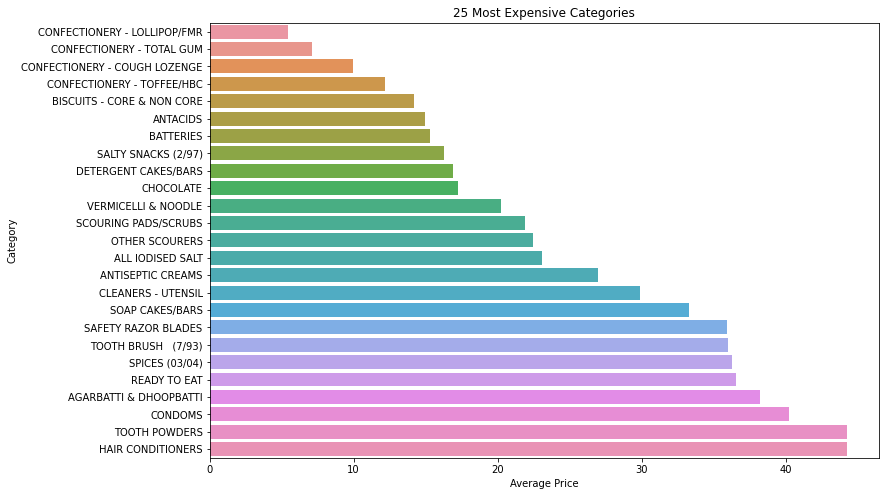

In [17]:
grp_per_price = merged_data.groupby("GRP").mean().sort_values("PRICE", ascending=True)[["PRICE","QTY_x"]][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='PRICE',y=grp_per_price.index,data=grp_per_price)
plt.title("25 Most Expensive Categories")
plt.ylabel("Category")
plt.xlabel("Average Price")

**Top Revenue Generating Brands(By value of Sales)**

Text(0, 0.5, 'Brands')

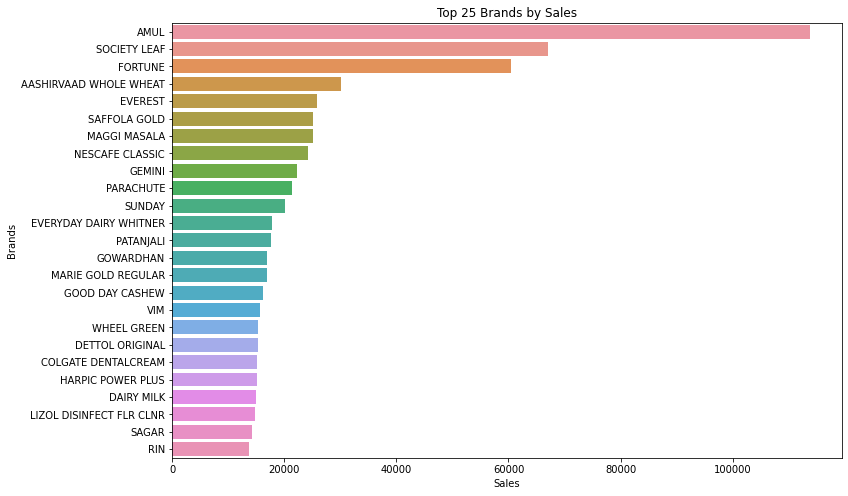

In [18]:
brands_v = merged_data.groupby('BRD').sum().sort_values('VALUE',ascending=False)[['VALUE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='VALUE',y=brands_v.index,data=brands_v)
plt.title("Top 25 Brands by Sales")
plt.xlabel("Sales")
plt.ylabel("Brands")

**Top Brands by Quantitties(Units) Sold**

Text(0, 0.5, 'Brands')

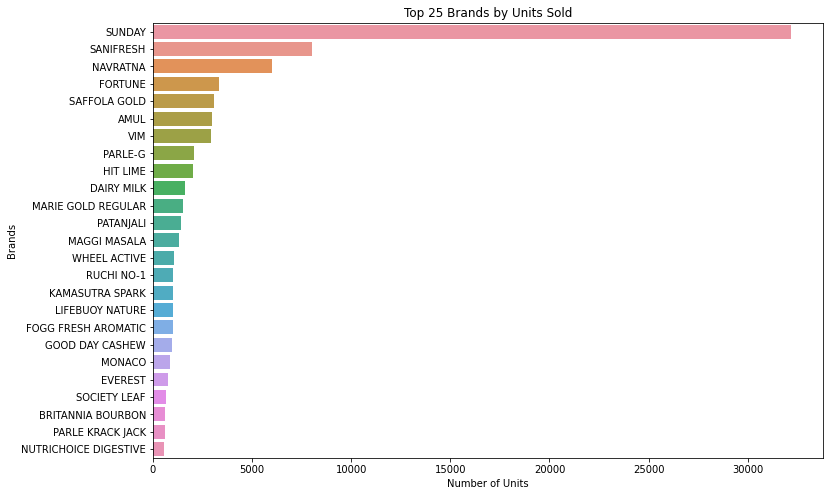

In [19]:
brands_q = merged_data.groupby('BRD').sum().sort_values('QTY_x',ascending=False)[['VALUE','QTY_x']][0:25]
plt.figure(figsize=(12,8))
sns.barplot(x='QTY_x',y=brands_q.index,data=brands_q)
plt.title("Top 25 Brands by Units Sold")
plt.xlabel("Number of Units")
plt.ylabel("Brands")

**Volume Handeled by each Store**

In [20]:
store_qty = merged_data.groupby("UNIQUE_ID").sum()[['QTY_x','PRICE']]
store_qty['STORE'] = store_qty.index.str.split('_').str[0]
store_qty

,QTY_x,PRICE,STORE
UNIQUE_ID,,,
N10_T1038,1.0,34.0,N10
N10_T1039,1.0,46.0,N10
N10_T1040,1.0,86.0,N10
N10_T1043,1.0,20.0,N10
N10_T1048,2.0,180.0,N10
...,...,...,...
N9_T940,1.0,200.0,N9
N9_T95,1.0,56.0,N9
N9_T953,28.0,885.0,N9


Text(0, 0.5, 'Units')

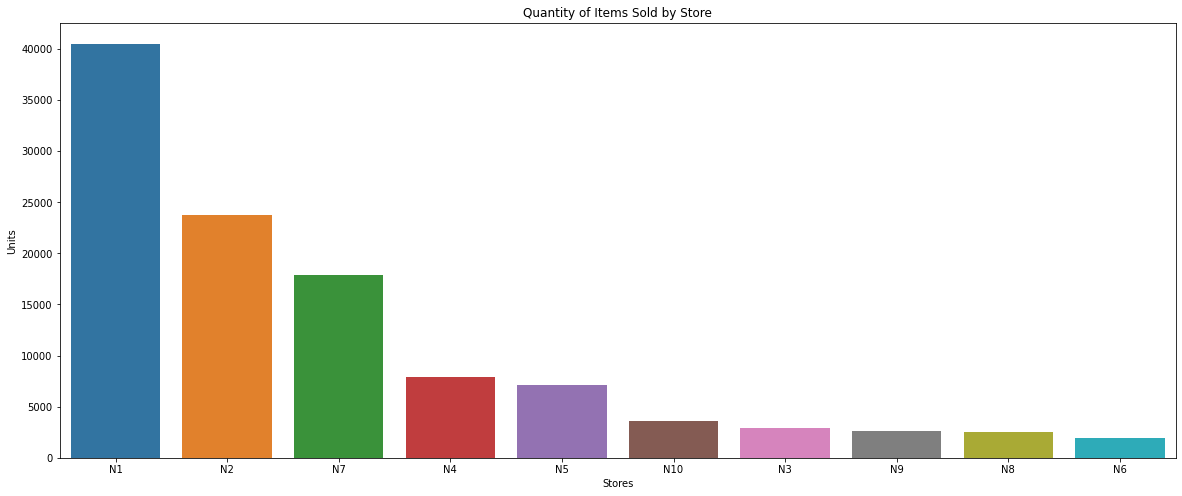

In [21]:
units_by_store = store_qty.groupby("STORE").sum().sort_values('QTY_x',ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=units_by_store.index,y=units_by_store["QTY_x"],data=units_by_store)
plt.title("Quantity of Items Sold by Store")
plt.xlabel("Stores")
plt.ylabel("Units")

**Sale in each Month**

In [22]:
month_info = merged_data[["MONTH","UNIQUE_ID"]]
month_info

,MONTH,UNIQUE_ID
0,M1,N1_T375
1,M1,N1_T379
2,M1,N1_T381
3,M1,N1_T382
4,M1,N1_T384
...,...,...
26980,M3,N10_T5999
26981,M3,N10_T6007
26982,M3,N10_T6007
26983,M3,N10_T6007


In [23]:
monthly_sales = pd.merge(month_info,unique_sales,on="UNIQUE_ID")
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE
0,M1,N1_T375,4.0,225.0,N1
1,M1,N1_T379,4.0,95.0,N1
2,M1,N1_T381,4.0,10.0,N1
3,M1,N1_T382,4.0,108.0,N1
4,M1,N1_T384,4.0,19.0,N1
...,...,...,...,...,...
26980,M3,N10_T5999,31.0,10.0,N10
26981,M3,N10_T6007,31.0,88.0,N10
26982,M3,N10_T6007,31.0,88.0,N10
26983,M3,N10_T6007,31.0,88.0,N10


In [24]:
monthly_sales['N_MONTH'] = monthly_sales['MONTH'].apply(lambda x: x[1])
monthly_sales

,MONTH,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,M1,N1_T375,4.0,225.0,N1,1
1,M1,N1_T379,4.0,95.0,N1,1
2,M1,N1_T381,4.0,10.0,N1,1
3,M1,N1_T382,4.0,108.0,N1,1
4,M1,N1_T384,4.0,19.0,N1,1
...,...,...,...,...,...,...
26980,M3,N10_T5999,31.0,10.0,N10,3
26981,M3,N10_T6007,31.0,88.0,N10,3
26982,M3,N10_T6007,31.0,88.0,N10,3
26983,M3,N10_T6007,31.0,88.0,N10,3


In [25]:
monthly_sales = monthly_sales.drop('MONTH',axis=1)
monthly_sales

,UNIQUE_ID,DAY_y,BILL_AMT_y,STORE,N_MONTH
0,N1_T375,4.0,225.0,N1,1
1,N1_T379,4.0,95.0,N1,1
2,N1_T381,4.0,10.0,N1,1
3,N1_T382,4.0,108.0,N1,1
4,N1_T384,4.0,19.0,N1,1
...,...,...,...,...,...
26980,N10_T5999,31.0,10.0,N10,3
26981,N10_T6007,31.0,88.0,N10,3
26982,N10_T6007,31.0,88.0,N10,3
26983,N10_T6007,31.0,88.0,N10,3


In [26]:
monthly_sales['N_MONTH'] = pd.to_numeric(monthly_sales['N_MONTH'])

In [27]:
month_uq = monthly_sales.groupby('UNIQUE_ID').mean()
month_uq

,DAY_y,BILL_AMT_y,N_MONTH
UNIQUE_ID,,,
N10_T1038,5.0,34.0,1.0
N10_T1039,5.0,46.0,1.0
N10_T1040,5.0,86.0,1.0
N10_T1043,5.0,20.0,1.0
N10_T1048,5.0,180.0,1.0
...,...,...,...
N9_T940,2.0,200.0,3.0
N9_T95,7.0,56.0,1.0
N9_T953,3.0,1656.0,3.0


Text(0, 0.5, 'Sales')

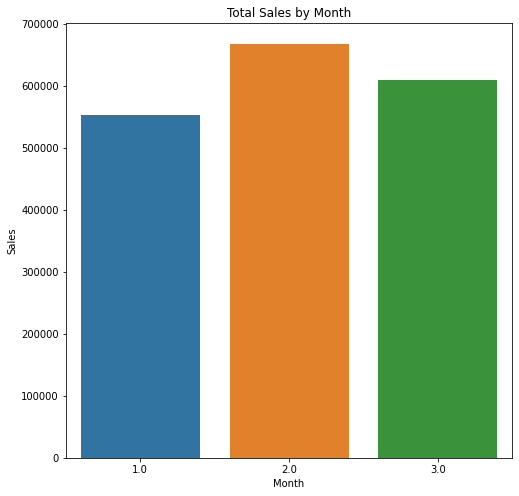

In [32]:
m_sales = month_uq.groupby('N_MONTH').sum()
plt.figure(figsize=(8,8))
sns.barplot(x=m_sales.index,y='BILL_AMT_y',data=m_sales)
plt.title("Total Sales by Month")
plt.xlabel('Month')
plt.ylabel('Sales')